In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from bim.sumo.network import make_base_stockport_net, SUMONetwork
from bim.traffic.optimiser import RegionExperiment, OptimiserDumpsManager
from bim.traffic.trips import SUMOTrips
from bim.gis.utils import EPSG_BNG
from bim.traffic.metrics import EDGE_TOTAL_TRAVELTIME, RAW_EDGE_METRIC_TIMELOSS
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# manager_config_path = 'gmdata.nosync/stockport_experiments_config.json'

In [4]:

# manager = None
# if os.path.exists(manager_config_path):
#     manager = OptimiserDumpsManager.parse_file(manager_config_path)

In [5]:
# manager.experiments[0].metrics

In [6]:
# manager.experiments[0].load_metrics()

In [7]:
# exp = manager.experiments[0]

In [8]:
network_name = 'gm_base_model'
base_network_path = os.path.join('gmdata.nosync/', network_name, f'{network_name}.json')
exp_dir_path = os.path.join('gmdata.nosync/', 'whole_gm_experiments')
experiment = RegionExperiment(location_name='gm',
                              run_name='run1_random_streets',
                              dir_path=exp_dir_path,
                              base_network_path=base_network_path,
                              config={
                                  'exist_ok': True
                              })

In [9]:
exp = experiment

In [10]:
sumo_modified_network = exp.load_modified_network()

In [11]:
from bim.traffic.tunnels import TunnelGenerator

In [12]:
%%time
tunnel_generator = TunnelGenerator(exp)

gmdata.nosync/whole_gm_experiments/run1_random_streets/gm_run1_random_streets_aggregated_info.xml:80414:0: no element found


/opt/homebrew/anaconda3/envs/data-science-algorithms/lib/python3.8/site-packages/shapely/measurement.py:74: RuntimeWarning: overflow encountered in distance
  return lib.distance(a, b, **kwargs)


CPU times: user 16.7 s, sys: 4.72 s, total: 21.5 s
Wall time: 23.5 s


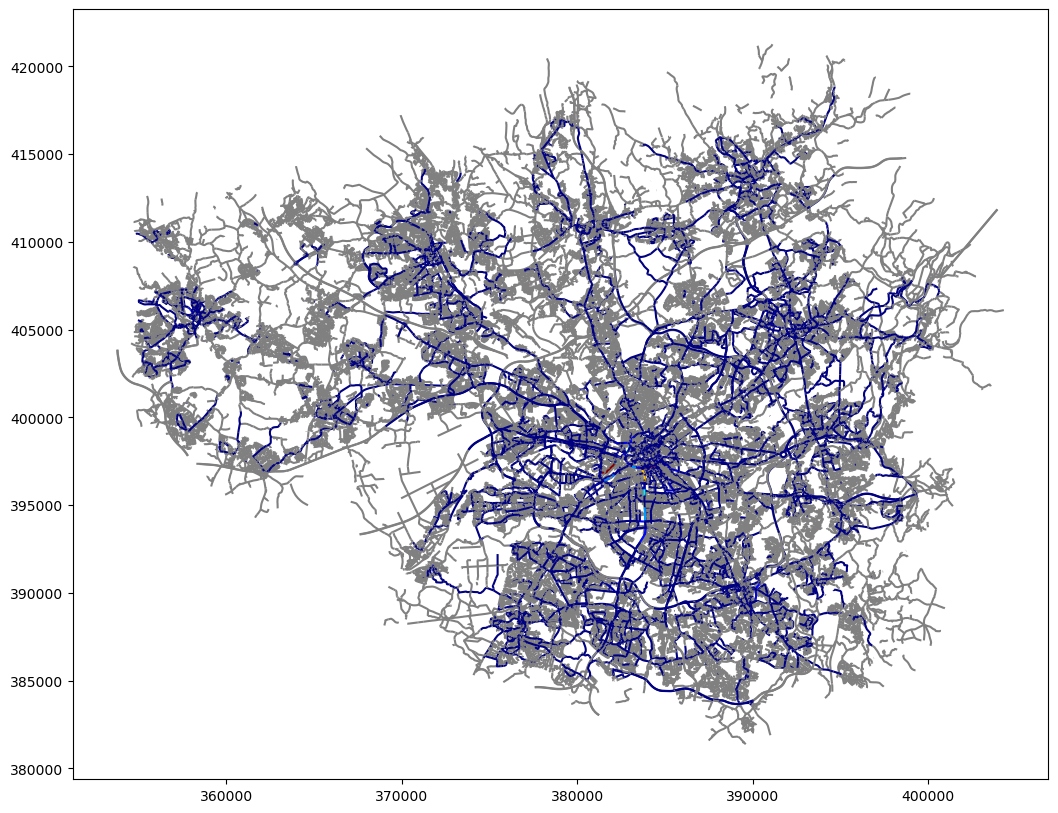

In [23]:
tunnel_generator.plot_whole_net_metric('timeLoss')

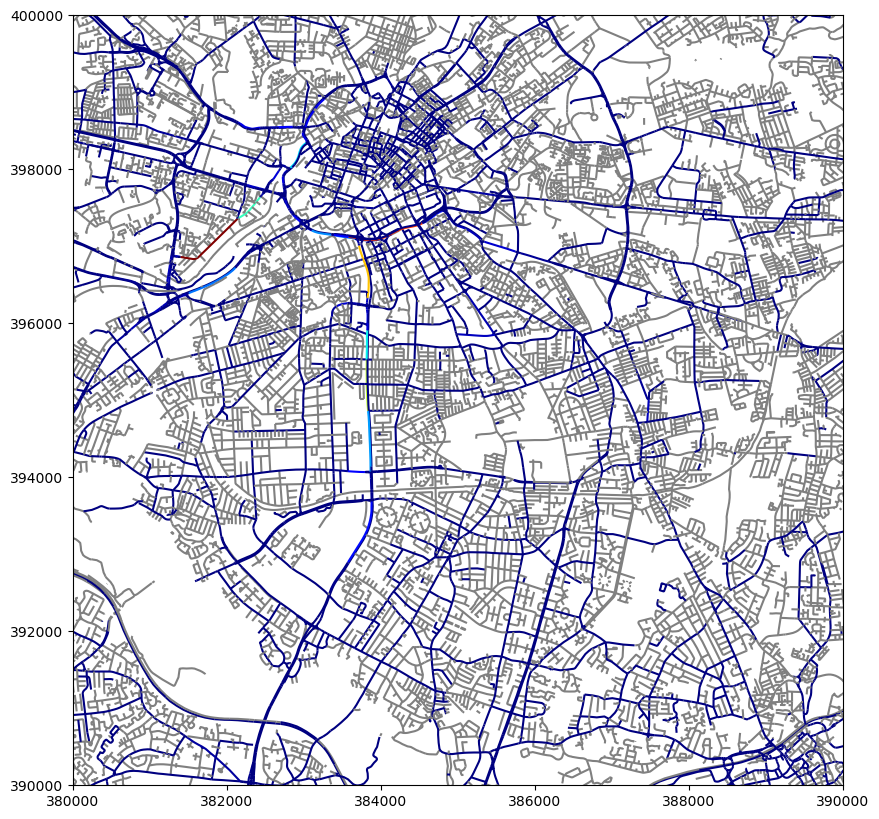

In [24]:
tunnel_generator.plot_whole_net_metric('timeLoss', True)

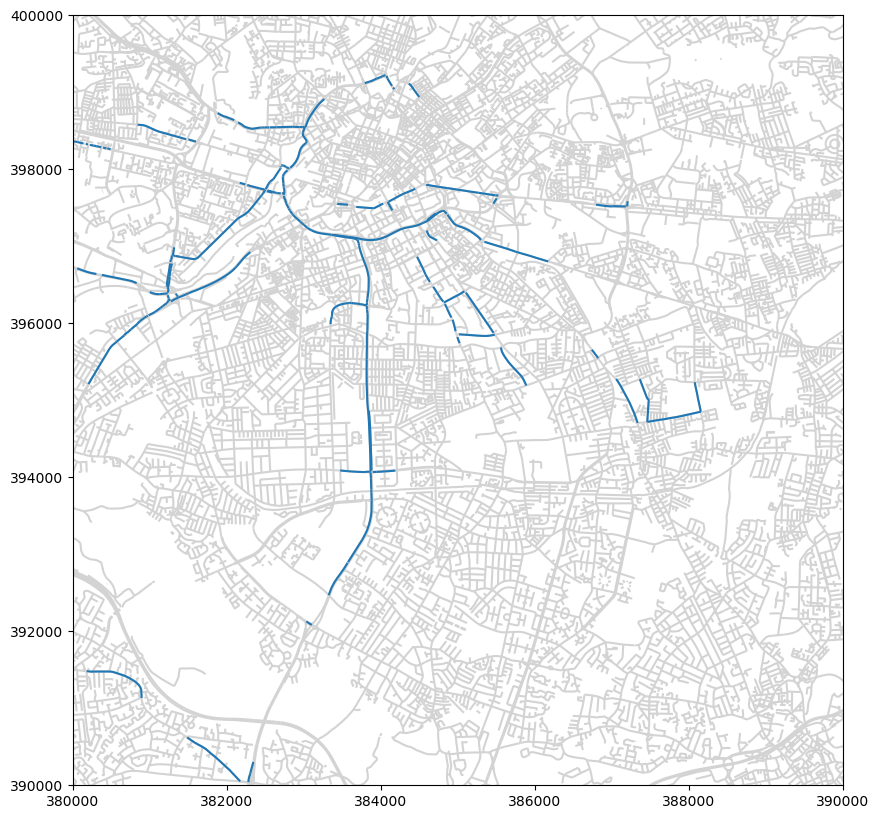

In [13]:
tunnel_generator.plot_congested_streets()

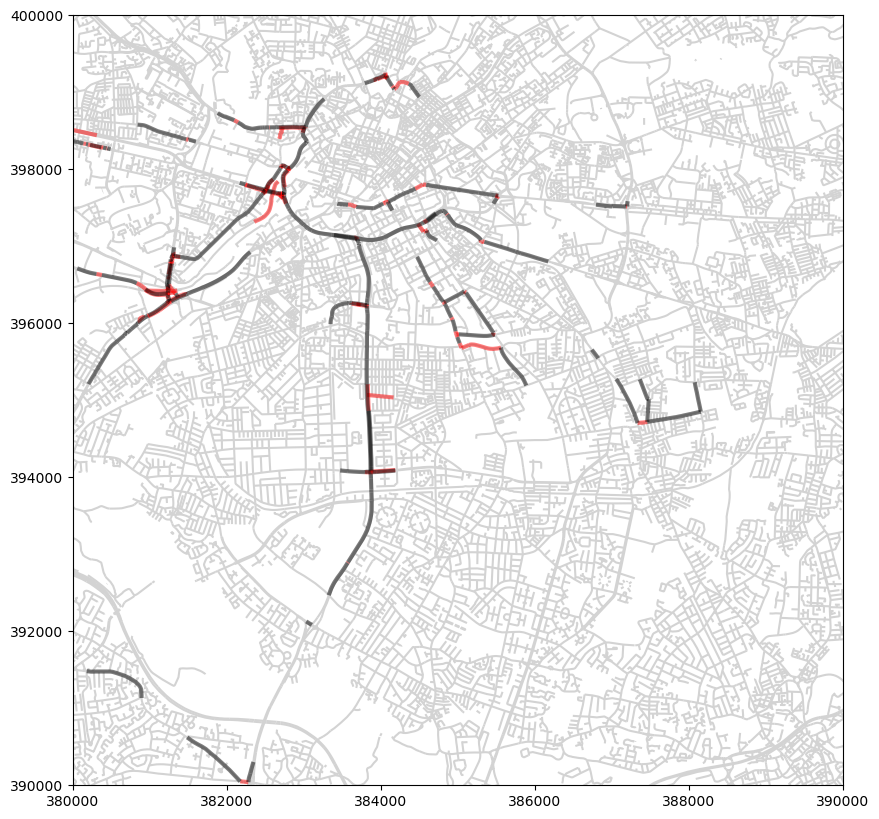

In [14]:
tunnel_generator.plot_intermediate_congested_streets()

CPU times: user 1min 59s, sys: 3.21 s, total: 2min 2s
Wall time: 2min 6s


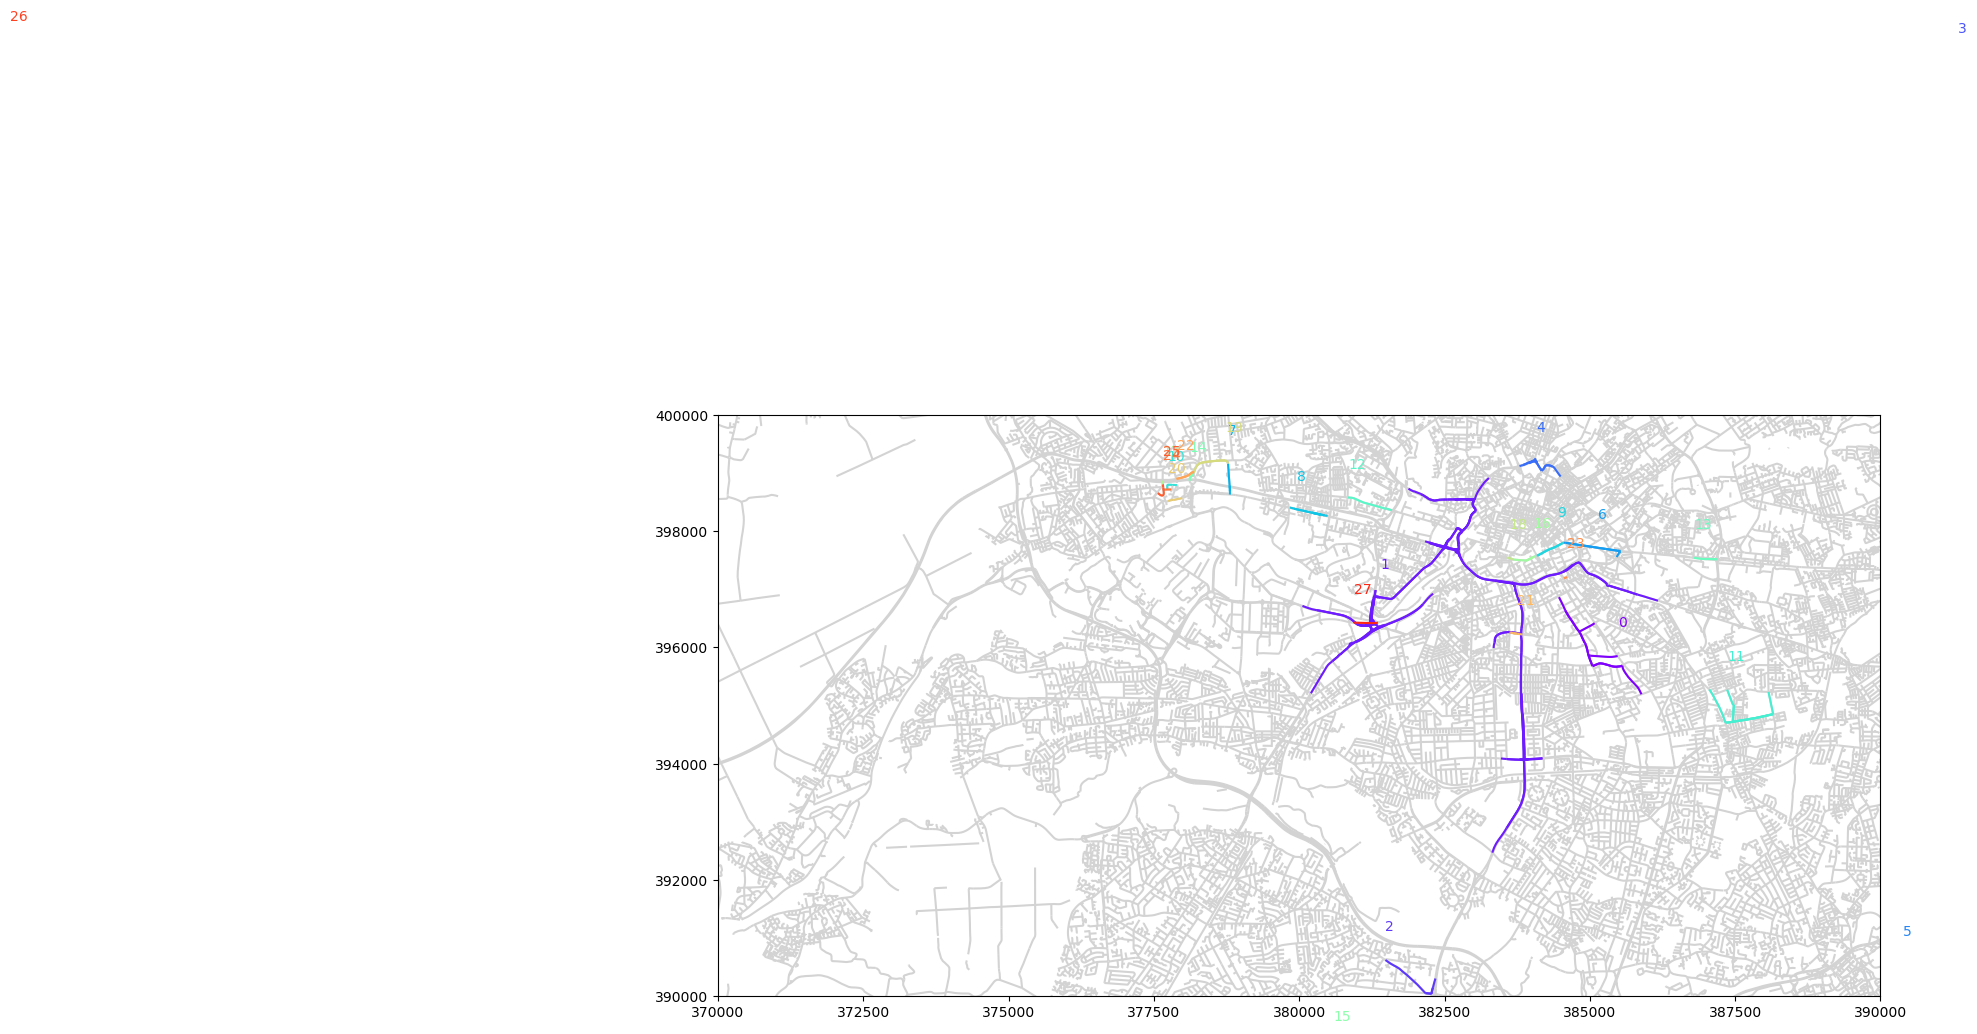

In [15]:
%%time
tunnel_generator.plot_graphs(plt.cm.rainbow)

target_graph_id=1
random_path #48 with len 2657.426183955007
random_path #55 with len 2181.2526999425068
random_path #88 with len 2298.71182937837
random_path #122 with len 2482.2785385630373
random_path #193 with len 2125.880706509237


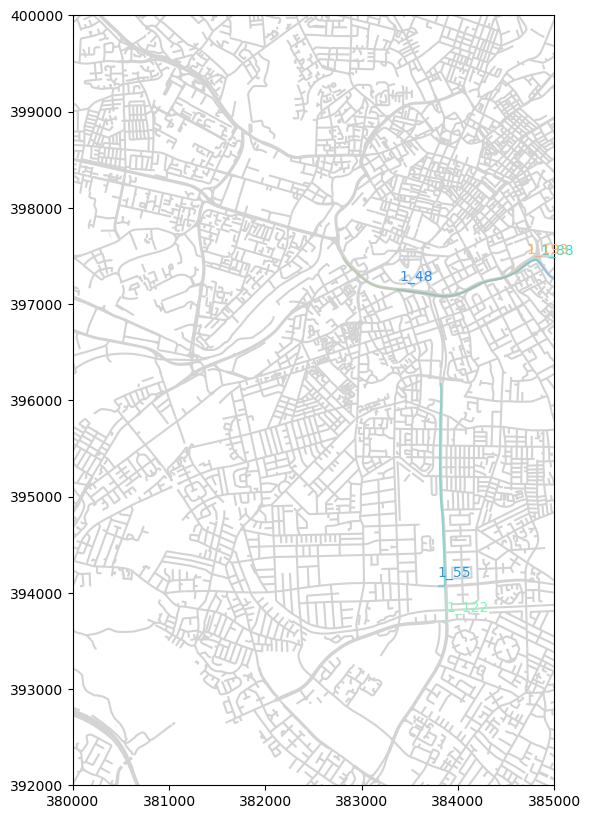

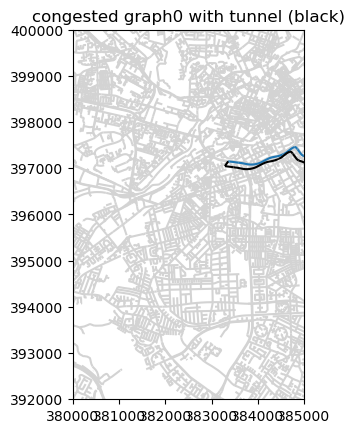

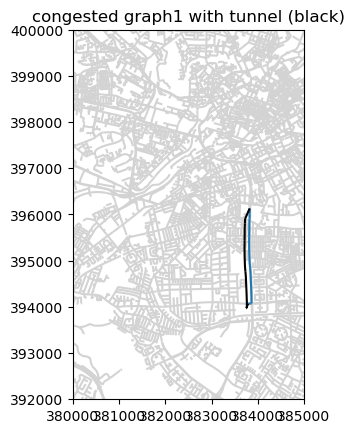

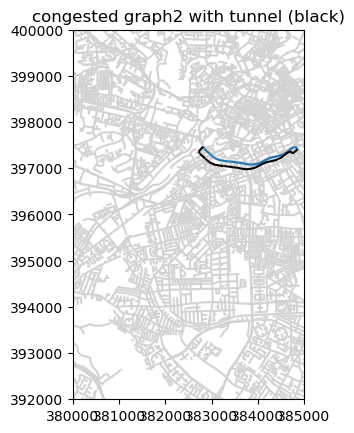

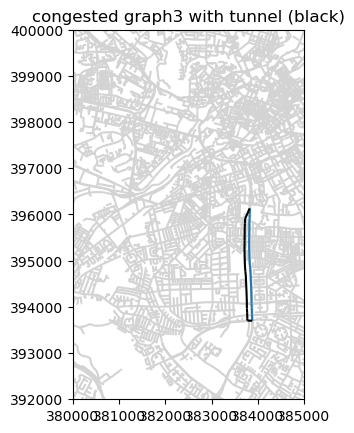

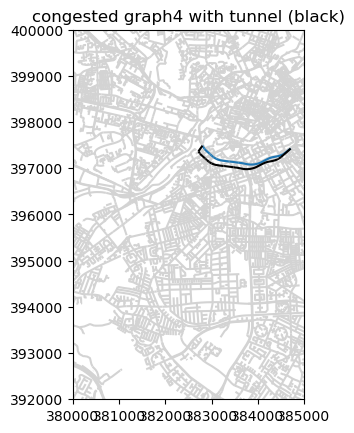

In [27]:
good_tunnel_paths = tunnel_generator.plot_tunnels()